<a href="https://colab.research.google.com/github/BKover99/spatialAUC/blob/main/Tutorials/spatialAUC_tutorial_cosmx_mouse_brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing packages and getting the links for the datasets.

In [1]:
!wget https://github.com/BKover99/Pseudovisium/raw/main/Datasets_all.xlsx
!pip install Pseudovisium -q
!pip install pympler -q
!pip install spatialAUC -q --upgrade


--2024-06-20 12:56:15--  https://github.com/BKover99/Pseudovisium/raw/main/Datasets_all.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BKover99/Pseudovisium/main/Datasets_all.xlsx [following]
--2024-06-20 12:56:15--  https://raw.githubusercontent.com/BKover99/Pseudovisium/main/Datasets_all.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42301 (41K) [application/octet-stream]
Saving to: ‘Datasets_all.xlsx.1’

Datasets_all.xlsx.1 100%[===================>]  41.31K  --.-KB/s    in 0.01s   

2024-06-20 12:56:15 (3.76 MB/s) - ‘Datasets_all.xlsx.1’ saved [42301/42301]



Loading packages

In [2]:
import pandas as pd
from os import system
import os
import time
import squidpy as sq
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from pympler import asizeof
import json
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as metrics
import shutil
import subprocess
import concurrent.futures

Finding the dataset required for this Colab notebook.

In [ ]:
datasets = pd.read_excel("/content/Datasets_all.xlsx")
datasets_to_use = datasets[datasets["Brain case study"]==1]
download_link = datasets_to_use["Onedrive_link"].values[0]
!wget https://ywobqw.bl.files.1drv.com/y4mnkgdMt9PQDjy_KeoASubj2GkF8Ro0xggVKMegwWL2EqBQaVXMq6-28emVeQKpe0pY0vf-ZaMWUR1jhZTcg555duknK_p6Se7HsxcI7b3UdOPpNAQLS7_XUQ9lK2T4IIfsfLe4wGjlWPXkp5Jb0LL9z23hgY32LnPowmzrS585zsjjDLKCZBLP6-lyhTHfG3ug-xMX8wGjNb2GWaUYXJzYQ

--2024-06-20 10:46:09--  https://ywobqw.bl.files.1drv.com/y4mnkgdMt9PQDjy_KeoASubj2GkF8Ro0xggVKMegwWL2EqBQaVXMq6-28emVeQKpe0pY0vf-ZaMWUR1jhZTcg555duknK_p6Se7HsxcI7b3UdOPpNAQLS7_XUQ9lK2T4IIfsfLe4wGjlWPXkp5Jb0LL9z23hgY32LnPowmzrS585zsjjDLKCZBLP6-lyhTHfG3ug-xMX8wGjNb2GWaUYXJzYQ
Resolving ywobqw.bl.files.1drv.com (ywobqw.bl.files.1drv.com)... 13.107.42.12
Connecting to ywobqw.bl.files.1drv.com (ywobqw.bl.files.1drv.com)|13.107.42.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1923239861 (1.8G) [application/zip]
Saving to: ‘y4mnkgdMt9PQDjy_KeoASubj2GkF8Ro0xggVKMegwWL2EqBQaVXMq6-28emVeQKpe0pY0vf-ZaMWUR1jhZTcg555duknK_p6Se7HsxcI7b3UdOPpNAQLS7_XUQ9lK2T4IIfsfLe4wGjlWPXkp5Jb0LL9z23hgY32LnPowmzrS585zsjjDLKCZBLP6-lyhTHfG3ug-xMX8wGjNb2GWaUYXJzYQ.1’

y4mnkgdMt9PQDjy_Keo 100%[===================>]   1.79G  22.2MB/s    in 93s     

2024-06-20 10:47:42 (19.8 MB/s) - ‘y4mnkgdMt9PQDjy_KeoASubj2GkF8Ro0xggVKMegwWL2EqBQaVXMq6-28emVeQKpe0pY0vf-ZaMWUR1jhZTcg555duknK_p6Se7HsxcI7b3

Unzipping the data

In [ ]:
!unzip /content/y4mnkgdMt9PQDjy_KeoASubj2GkF8Ro0xggVKMegwWL2EqBQaVXMq6-28emVeQKpe0pY0vf-ZaMWUR1jhZTcg555duknK_p6Se7HsxcI7b3UdOPpNAQLS7_XUQ9lK2T4IIfsfLe4wGjlWPXkp5Jb0LL9z23hgY32LnPowmzrS585zsjjDLKCZBLP6-lyhTHfG3ug-xMX8wGjNb2GWaUYXJzYQ -d /content/CosMx_mouse_brain


Archive:  /content/y4mnkgdMt9PQDjy_KeoASubj2GkF8Ro0xggVKMegwWL2EqBQaVXMq6-28emVeQKpe0pY0vf-ZaMWUR1jhZTcg555duknK_p6Se7HsxcI7b3UdOPpNAQLS7_XUQ9lK2T4IIfsfLe4wGjlWPXkp5Jb0LL9z23hgY32LnPowmzrS585zsjjDLKCZBLP6-lyhTHfG3ug-xMX8wGjNb2GWaUYXJzYQ.1
   creating: /content/CosMx_mouse_brain/mouse brain parts/
  inflating: /content/CosMx_mouse_brain/mouse brain parts/.DS_Store  
  inflating: /content/CosMx_mouse_brain/__MACOSX/mouse brain parts/._.DS_Store  
   creating: /content/CosMx_mouse_brain/mouse brain parts/Brain_files/
  inflating: /content/CosMx_mouse_brain/__MACOSX/mouse brain parts/._Brain_files  
   creating: /content/CosMx_mouse_brain/mouse brain parts/__MACOSX/
  inflating: /content/CosMx_mouse_brain/__MACOSX/mouse brain parts/.___MACOSX  
  inflating: /content/CosMx_mouse_brain/mouse brain parts/Brain_files/.DS_Store  
  inflating: /content/CosMx_mouse_brain/__MACOSX/mouse brain parts/Brain_files/._.DS_Store  
  inflating: /content/CosMx_mouse_brain/mouse brain parts/Brain_files/mill

Running the hexagonal binning using Pseudovisium generate

In [15]:
from Pseudovisium.pseudovisium_generate import generate_pv
output_path="/content/"
hexagon_size=20
max_workers=10

start_pv = time.time()
technology = datasets_to_use["Technology"].values[0]
name=datasets_to_use["Name"].values[0]
csv_file = "/content/CosMx_mouse_brain/mouse brain parts/Brain_files/Run1000_S1_Half_tx_file.csv"
df = pd.read_csv(csv_file)

  # Create a new column called 'cell' by concatenating 'fov' and 'cell_ID' columns
df['cell'] = df['fov'].astype(str) + '_' + df['cell_ID'].astype(str)

  # Save the updated DataFrame back to the original CSV file
df.to_csv(csv_file, index=False)
technology = "CosMx"
ctu= 0.12028
print(ctu)

generate_pv(csv_file=csv_file,
            hexagon_size=hexagon_size,
            output_path=output_path,
            batch_size=1000000,
            technology=technology,
            max_workers=max_workers,
            project_name=name,
            shift_to_positive=True,
            coord_to_um_conversion=ctu)

<ipython-input-15-9d803ef15560>:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


0.12028
You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-20
Technology is Nanostring. Going forward with default column names.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_hexarkmfq8zc
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Created batch 11
Created batch 12
Created batch 13
Created batch 14
Created batch 15
Created batch 16
Created batch 17
Created batch 18
Created batch 19
Created batch 20
Created batch 21
Created batch 22
Created batch 23
Created batch 24
Created batch 25
Created batch 26
Created batch 27
Created batch 28
Created batch 29
Created batch 30
Created batch 31
Created batch 32
Created batch 33
Created batch 34
Created batch 35
Created batch 36
Created batch 37
Created batch 38
Created batch 39
Created batch 

Processing batches: 100%|██████████| 117/117 [06:48<00:00,  3.49s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/CosMx_mouse_brain
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 116159827.0
Number of unique hexagons: 24610
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 1211.182256937027 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.


Reading in the data and processing it.

In [17]:
adata_pv = sq.read.visium("/content/pseudovisium/CosMx_mouse_brain",library_id="library_id")
sc.pp.filter_genes(adata_pv, min_cells=50)
sc.pp.filter_cells(adata_pv, min_counts=100)
sc.pp.normalize_total(adata_pv, target_sum=1e4)
sc.pp.neighbors(adata_pv, n_neighbors=30, n_pcs=20)
sq.gr.spatial_neighbors(adata_pv, radius=250, coord_type="generic", delaunay=True)
adata_pv

         Falling back to preprocessing with `sc.pp.pca` and default params.


AnnData object with n_obs × n_vars = 22621 × 960
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'neighbors', 'spatial_neighbors'
    obsm: 'spatial', 'X_pca'
    obsp: 'distances', 'connectivities', 'spatial_connectivities', 'spatial_distances'

Available gene sets

In [18]:
genes = adata_pv.var_names

In [19]:
from spatialAUC.spatialAUC import get_df_from_gmt
df = get_df_from_gmt(['m5.all', 'm2.all'], '2023.1.Mm', genes,min_gene_ratio=0.3, min_gene_count=10)
df

/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]
/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:72: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]


gene_set  \
0                 GOBP_NEUROTRANSMITTER_UPTAKE   
1                  GOBP_NEUTROPHIL_HOMEOSTASIS   
2            GOBP_ENDOTHELIAL_CELL_DEVELOPMENT   
3      GOBP_SYNAPTIC_TRANSMISSION_DOPAMINERGIC   
4                        GOBP_STARTLE_RESPONSE   
..                                         ...   
295         REACTOME_APOPTOTIC_EXECUTION_PHASE   
296                     REACTOME_RET_SIGNALING   
297        REACTOME_MET_PROMOTES_CELL_MOTILITY   
298  REACTOME_EXTRA_NUCLEAR_ESTROGEN_SIGNALING   
299       REACTOME_FOXO_MEDIATED_TRANSCRIPTION   

                                                 genes  gene_present  \
0    [Slc6a5, Slc18a1, Slc6a3, Slc29a2, Drd2, Drd3,...            14   
1    [Mthfd1, Tspan9, Btk, Cd44, Cfh, Cxcr2, Ccr2, ...            12   
2    [Mir874, Rapgef1, Rap1a, Add1, Agt, Cdh5, Cldn...            22   
3    [Pmch, Chrna7, Chrnb2, Adora2a, Cdk5, Crh, Crh...            13   
4    [Adora2a, Pcdh15, Fabp7, Ctnna2, Slc6a3, Drd1,...            16   
..                                                 ...           ...   
295  [Kpnb1, Bcap31, Apc, Ctnnb1, Fnta, Mapt, Ocln,...            15   
296  [Mapk7, Pspn, Prkacb, Prkaca, Plcg1, Grb7, Frs...            15   
297  [Col1a1, Itga3, Rac1, Col5a3, Crkl, Met, Itga2...            11   
298  [Gnai3, Cav2, Calm1, Akt1, Cdkn1b, Akt2, Hspb1...            21   
299  [Kat2b, Akt1, Akt2, Ywhab, Akt3, Sirt1, Foxg1,...            12   

     total_genes                                 gene_names_present  
0             44  [Gpm6b, Nos1, Slc18a2, Drd2, Snca, Gdnf, Slc6a...  
1             32  [Jam3, Cd44, Mertk, Cfh, Pik3cb, Il6, Ifng, Hm...  
2             71  [Pde4d, Ptprs, Ednra, Dmd, Ednrb, Vegfa, Dicer...  
3             31  [Chrna7, Adora2a, Crh, Drd1, Pink1, Gdnf, Drd2...  
4             40  [Pten, Adora2a, Drd2, Drd1, Grin2a, Penk, Prkn...  
..           ...                                                ...  
295           49  [Rock1, Vim, Gas2, Dnm1l, Apc, Prkcq, Tjp1, Hm...  
296           38  [Frs2, Grb10, Gdnf, Shc3, Artn, Ret, Sos1, Gab...  
297           32  [Itga2, Col1a1, Gab1, Fn1, Grb2, Rap1a, Megf11...  
298           68  [Calm2, Mmp9, Akt1, Egfr, Mapk1, Calm3, Akt3, ...  
299           21  [Foxo3, Sirt1, Ywhaq, Smad3, Akt1, Akt3, Foxo1...  

[300 rows x 5 columns]

In [20]:
import scanpy as sc
from spatialAUC.spatialAUC import spatial_auc

morans_table, adata_updated = spatial_auc(adata_pv, gene_sets=["m5.all", "m2.all"],min_gene_ratio=0.3, min_gene_count=10)

# Access the results
morans_table

/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]
/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:72: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]


  0%|          | 0/1000 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


I  pval_norm  \
GOCC_EXCITATORY_SYNAPSE                             0.640753        0.0   
REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES      0.638175        0.0   
GOCC_NEURON_SPINE                                   0.634267        0.0   
GOCC_CYTOSOLIC_REGION                               0.629873        0.0   
REACTOME_UNBLOCKING_OF_NMDA_RECEPTORS_GLUTAMATE...  0.624106        0.0   
...                                                      ...        ...   
REACTOME_SIGNALING_BY_NTRKS                         0.099637        0.0   
GOBP_REGULATION_OF_NEUTROPHIL_CHEMOTAXIS            0.091342        0.0   
GOBP_POSITIVE_REGULATION_OF_AMYLOID_BETA_FORMATION  0.084583        0.0   
GOBP_NEURON_DEATH_IN_RESPONSE_TO_OXIDATIVE_STRESS   0.070328        0.0   
GOBP_RESPONSE_TO_AXON_INJURY                        0.056271        0.0   

                                                    var_norm  pval_z_sim  \
GOCC_EXCITATORY_SYNAPSE                             0.000015         0.0   
REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES      0.000015         0.0   
GOCC_NEURON_SPINE                                   0.000015         0.0   
GOCC_CYTOSOLIC_REGION                               0.000015         0.0   
REACTOME_UNBLOCKING_OF_NMDA_RECEPTORS_GLUTAMATE...  0.000015         0.0   
...                                                      ...         ...   
REACTOME_SIGNALING_BY_NTRKS                         0.000015         0.0   
GOBP_REGULATION_OF_NEUTROPHIL_CHEMOTAXIS            0.000015         0.0   
GOBP_POSITIVE_REGULATION_OF_AMYLOID_BETA_FORMATION  0.000015         0.0   
GOBP_NEURON_DEATH_IN_RESPONSE_TO_OXIDATIVE_STRESS   0.000015         0.0   
GOBP_RESPONSE_TO_AXON_INJURY                        0.000015         0.0   

                                                    pval_sim   var_sim  \
GOCC_EXCITATORY_SYNAPSE                             0.000999  0.000030   
REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES      0.000999  0.000030   
GOCC_NEURON_SPINE                                   0.000999  0.000030   
GOCC_CYTOSOLIC_REGION                               0.000999  0.000031   
REACTOME_UNBLOCKING_OF_NMDA_RECEPTORS_GLUTAMATE...  0.000999  0.000029   
...                                                      ...       ...   
REACTOME_SIGNALING_BY_NTRKS                         0.000999  0.000011   
GOBP_REGULATION_OF_NEUTROPHIL_CHEMOTAXIS            0.000999  0.000010   
GOBP_POSITIVE_REGULATION_OF_AMYLOID_BETA_FORMATION  0.000999  0.000009   
GOBP_NEURON_DEATH_IN_RESPONSE_TO_OXIDATIVE_STRESS   0.000999  0.000009   
GOBP_RESPONSE_TO_AXON_INJURY                        0.000999  0.000010   

                                                    pval_norm_fdr_bh  \
GOCC_EXCITATORY_SYNAPSE                                          0.0   
REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES                   0.0   
GOCC_NEURON_SPINE                                                0.0   
GOCC_CYTOSOLIC_REGION                                            0.0   
REACTOME_UNBLOCKING_OF_NMDA_RECEPTORS_GLUTAMATE...               0.0   
...                                                              ...   
REACTOME_SIGNALING_BY_NTRKS                                      0.0   
GOBP_REGULATION_OF_NEUTROPHIL_CHEMOTAXIS                         0.0   
GOBP_POSITIVE_REGULATION_OF_AMYLOID_BETA_FORMATION               0.0   
GOBP_NEURON_DEATH_IN_RESPONSE_TO_OXIDATIVE_STRESS                0.0   
GOBP_RESPONSE_TO_AXON_INJURY                                     0.0   

                                                    pval_z_sim_fdr_bh  \
GOCC_EXCITATORY_SYNAPSE                                           0.0   
REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES                    0.0   
GOCC_NEURON_SPINE                                                 0.0   
GOCC_CYTOSOLIC_REGION                                             0.0   
REACTOME_UNBLOCKING_OF_NMDA_RECEPTORS_GLUTAMATE...                0.0   
...                                                  

Because spatialAUC returns an adata object, we can continue and plot the results wiht the usual squidpy functions. In the next codeblock I will plot the top 20 results.

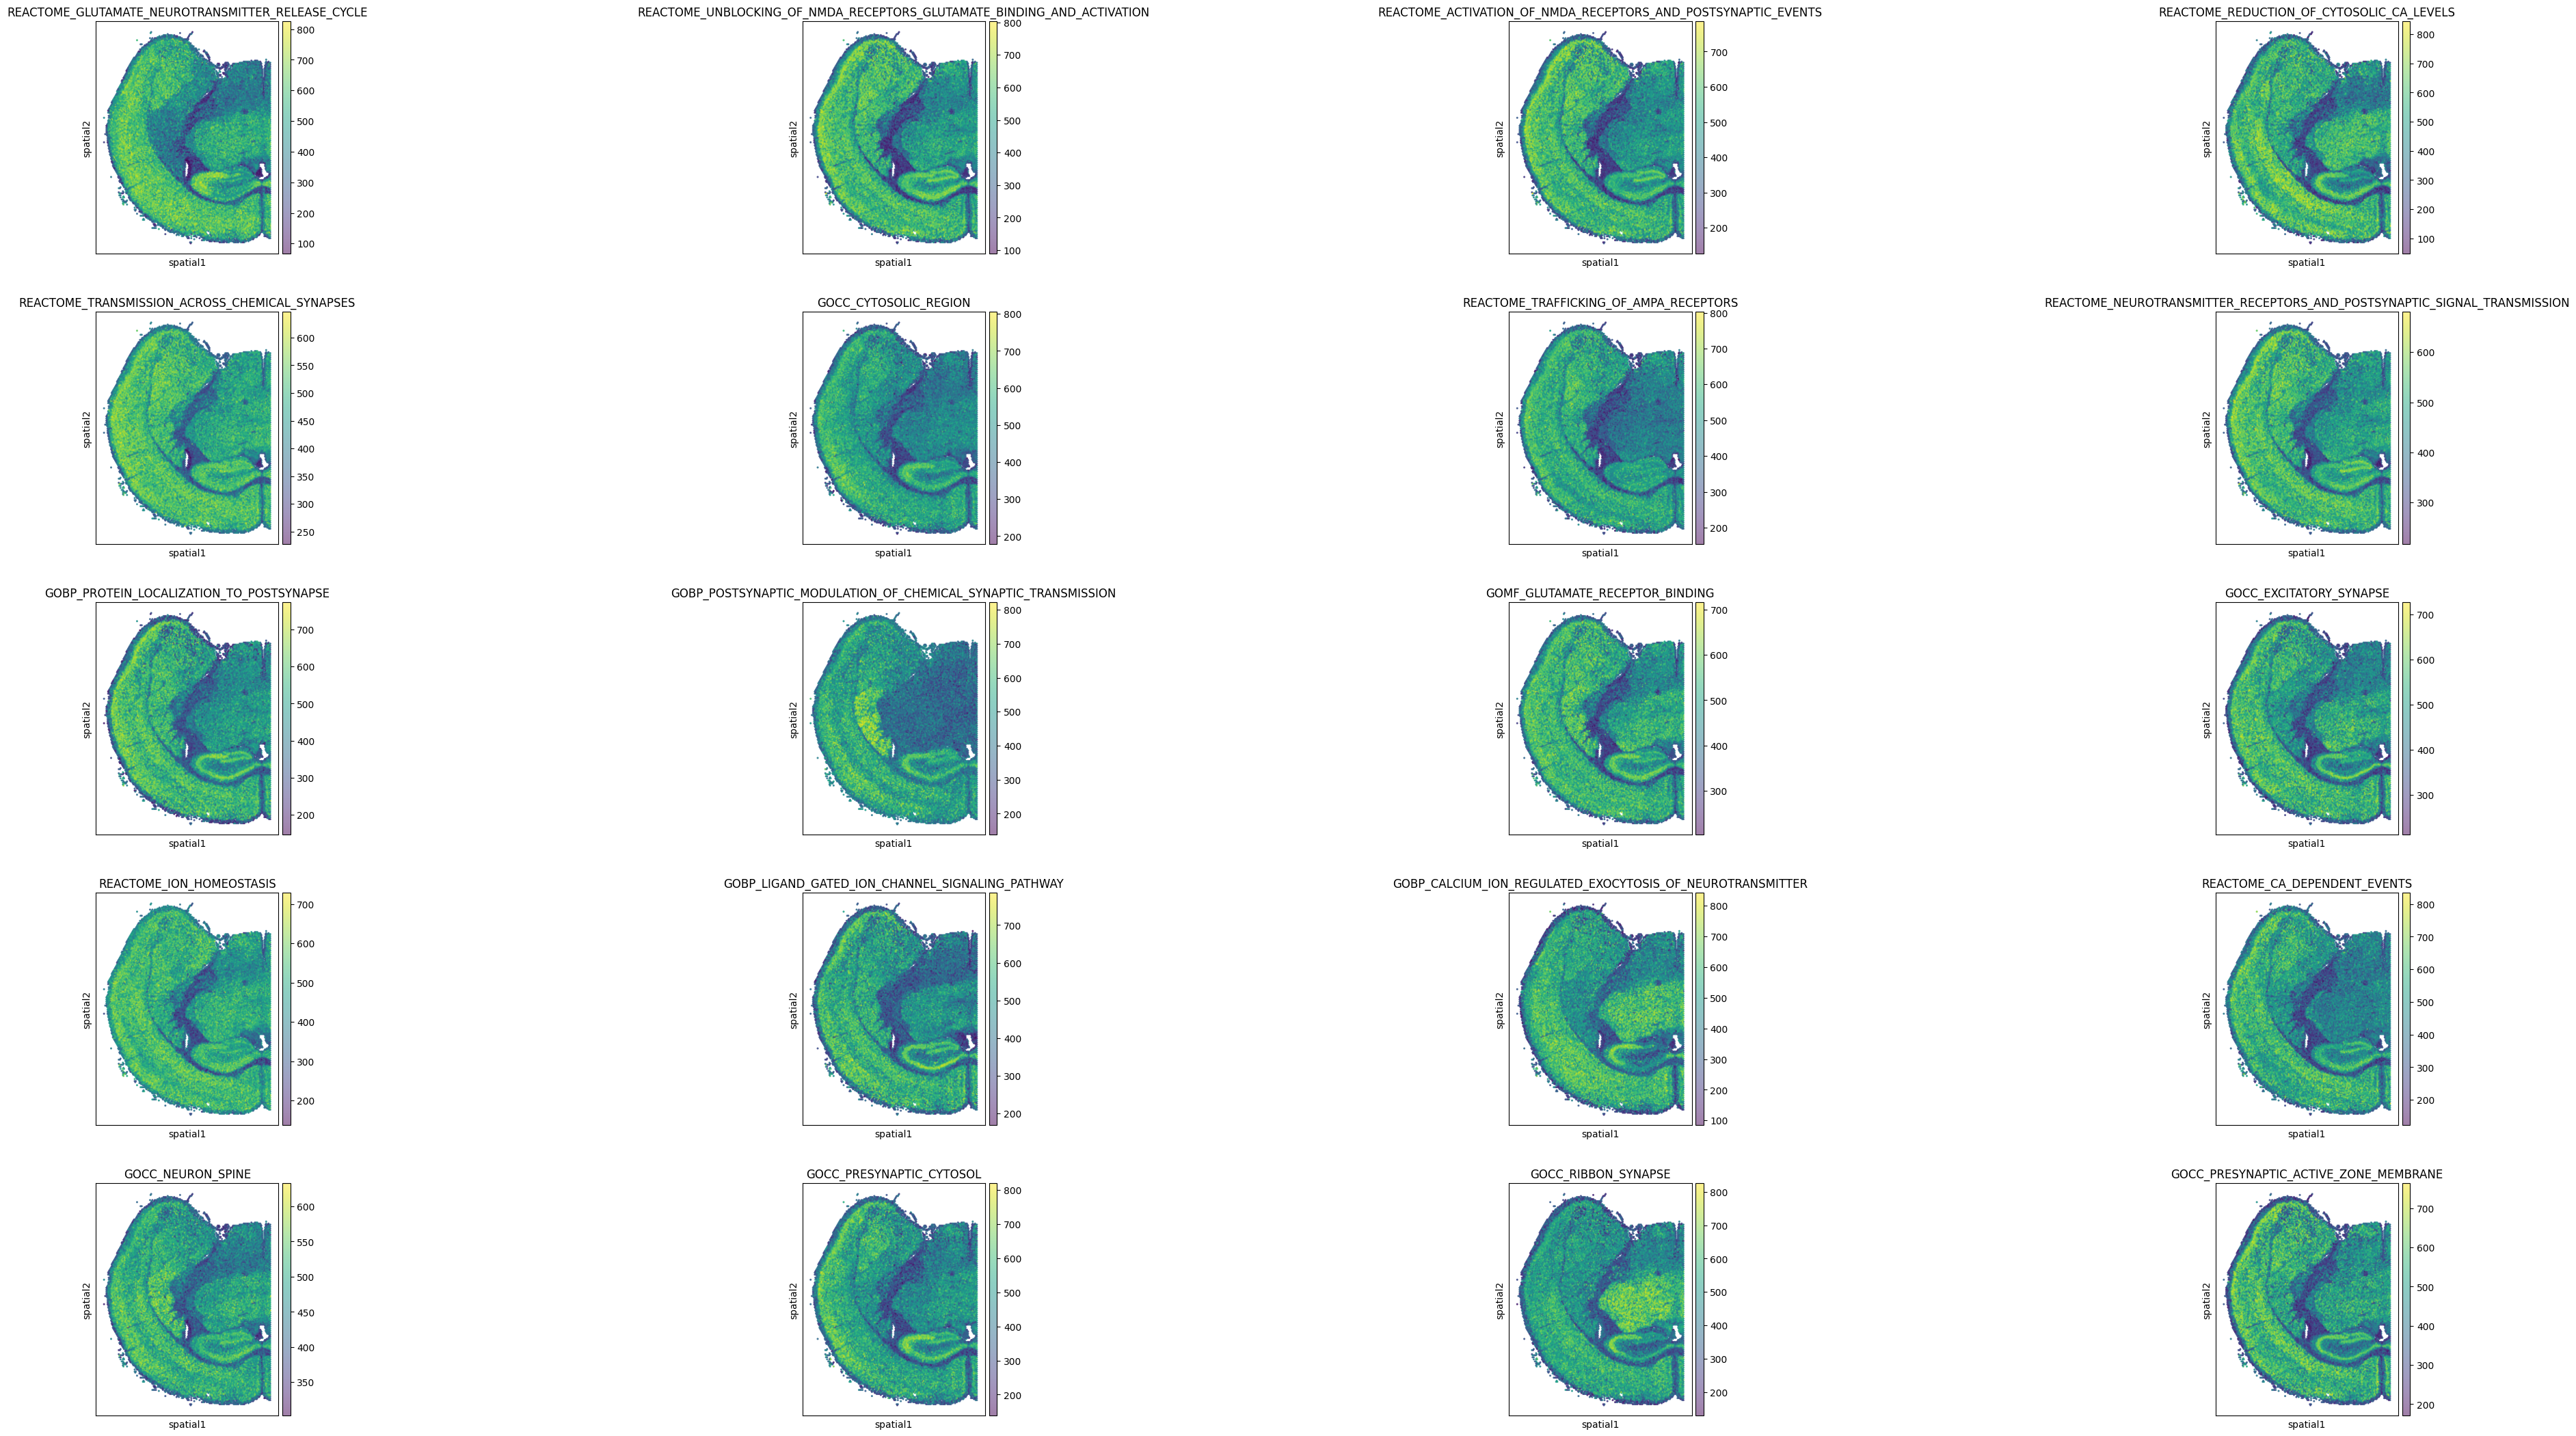

In [16]:
sq.pl.spatial_scatter(
        adata_updated, library_id="spatial", shape=None, color=morans_table.head(20).index.values,
        img=True, alpha=0.5, wspace=0.8
    )

In [ ]:
import subprocess

# Run the pip freeze command to get a list of installed packages
output = subprocess.check_output(['pip', 'freeze']).decode('utf-8').strip().split('\n')

print("Installed packages:")
for package in output:
    print(package)

Installed packages:
absl-py==1.4.0
access==1.1.9
adjustText==1.1.1
affine==2.4.0
aiobotocore==2.5.4
aiohttp==3.9.5
aioitertools==0.11.0
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
anndata==0.10.7
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_api_compat==1.7.1
array_record==0.5.1
arviz==0.15.1
asciitree==0.3.3
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.8.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
botocore==1.31.17
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.18.1
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.3
colorcet==3.1.0
colorlover=